In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [2]:
df = pd.read_csv('conversion.csv')

In [4]:
df.shape

(1143, 11)

In [6]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [7]:
df.xyz_campaign_id.nunique()

3

In [11]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

Задание 2

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

In [8]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Задание 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

In [26]:
df_fb_impression = df.groupby(by='fb_campaign_id') \
    .agg({'Impressions':'sum'})

In [30]:
df_fb_impression.Impressions = np.log(df_fb_impression.Impressions)
df_fb_impression.head()

,Impressions
fb_campaign_id,
103916,2.186327
103917,2.281400
103920,1.878095
103928,2.201110
103929,2.022537


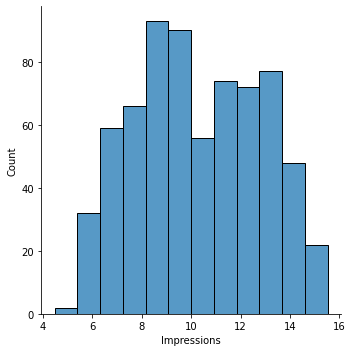

In [29]:
sns.displot(df_fb_impression, x='Impressions')

Задание 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR = clicks / impressions

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [32]:
df['CTR'] = df.Clicks / df.Impressions

In [34]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [35]:
df[df.CTR == df.CTR.max()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

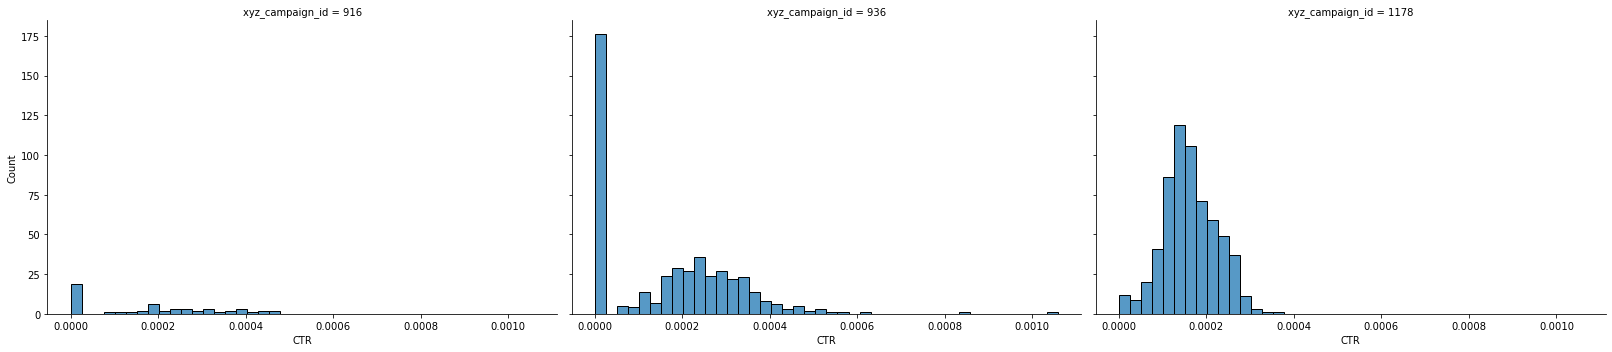

In [53]:
sns.displot(df, x='CTR', col='xyz_campaign_id', height=5, aspect=1.5)
# sns.displot(df.query('xyz_campaign_id == 916'), x='CTR', rug=True, height=5, aspect=1.5)

c:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR'>

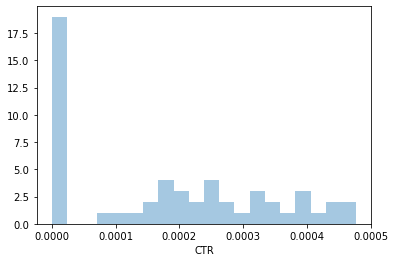

In [57]:
sns.distplot(df.query('xyz_campaign_id == 916').CTR, bins=20, kde=False)

Задание 6

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC = clicks / spent

​Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [83]:
df['CPC'] = df.Spent / df.Clicks

In [84]:
cpc_desc = df.CPC.describe()
cpc_desc

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [85]:
round(cpc_desc["75%"] - cpc_desc["25%"],2)

0.25

In [86]:
round(scipy.stats.iqr(df.CPC, nan_policy='omit'), 2)

0.25

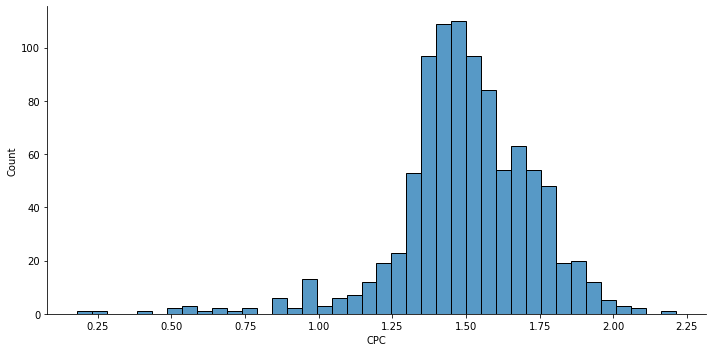

In [87]:
sns.displot(df.CPC.dropna(), height=5, aspect=2)

Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

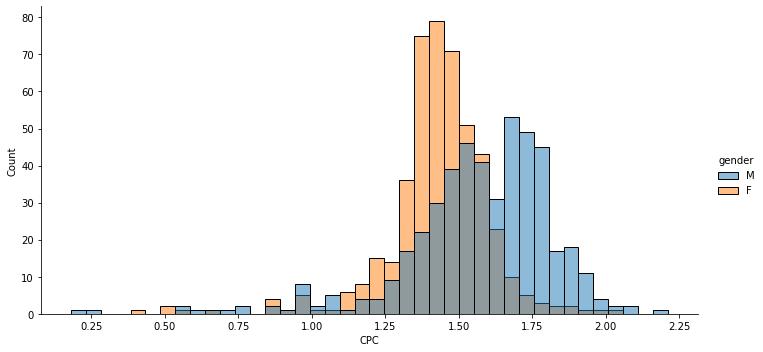

In [103]:
sns.displot(df, x='CPC', hue='gender', height=5, aspect=2, kind='hist')

c:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

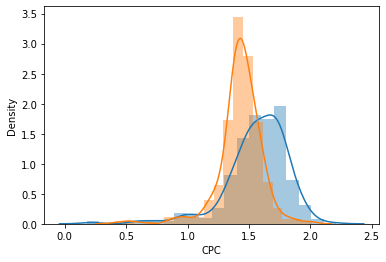

In [104]:
sns.distplot(df.query('gender == "M"').CPC.dropna(), bins=20)
sns.distplot(df.query('gender == "F"').CPC.dropna(), bins=20)

Задание 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [112]:
df['CR'] = df.Approved_Conversion / df.Clicks

In [115]:
df.query('Clicks > 0').CR.dropna().describe()

count    936.000000
mean       0.109030
std        0.247032
min        0.000000
25%        0.000000
50%        0.012539
75%        0.066667
max        2.000000
Name: CR, dtype: float64

In [120]:
df.query('ad_id == 1121814').CR.mul(100).round(2)

860    3.09
Name: CR, dtype: float64